
**Problem Statement**

The goal of this project is to develop a machine learning model that can automatically detect fraudulent credit card transactions. Using transaction data as input, the model learns to distinguish between **legitimate** and **fraudulent** behavior. This helps in reducing financial losses and improving security in digital payment systems.

**Input Features:**

The dataset includes the following features that describe each transaction:

* **distance_from_home**: How far the transaction was from the cardholder’s home
* **distance_from_last_transaction**: Distance between the current and previous transaction
* **ratio_to_median_purchase_price**: Purchase amount compared to typical spending
* **repeat_retailer**: Whether the transaction was with a familiar retailer (0 or 1)
* **used_chip**: Whether the card's chip was used (0 or 1)
* **used_pin_number**: Whether a PIN was used (0 or 1)
* **online_order**: Whether the transaction was made online (0 or 1)

**Target Variable:**

* **fraud**: Indicates if the transaction is fraudulent

  * 0 = Legitimate
  * 1 = Fraudulent

In [53]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import credit card dataset
import csv
with open ('credit_card.csv') as file:
    reader= csv.reader(file)

In [3]:
#reading in csv files
df=pd.read_csv('credit_card.csv')
print (df.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  


In [4]:
print (df.tail())

        distance_from_home  distance_from_last_transaction  \
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
999995                        1.626798              1.0        1.0   
999996                        2.778303              1.0        1.0   
999997                        0.218075              1.0        1.0   
999998                        0.475822              1.0        0.0   
999999                        0.386920              1.0        1.0   

        used_pin_number  online_order  fraud  
999995              0.0           0.0    0.0  
999996              0.0           0.0    0.0  
999997              0.0           1.0    0.0  
999998            

In [5]:
df.shape

(1000000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [7]:
df.describe()

distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.824182         0.881536        0.350399   
std                          2.799589         0.323157        0.477095   
min                          0.004399         0.000000        0.000000   
25%                          0.475673         1.000000        0.000000   
50%                          0.997717         1.000000        0.000000   
75%                          2.096370         1.000000        1.000000   
max                        267.802942         1.000000        1.000000   

       used_pin_number    online_order           fraud  
count   1000000.000000  1000000.000000  1000000.000000  
mean          0.100608        0.650552        0.087403  
std           0.300809        0.476796        0.282425  
min           0.000000        0.000000        0.000000  
25%           0.000000        0.000000        0.000000  
50%           0.000000        1.000000        0.000000  
75%           0.000000        1.000000        0.000000  
max           1.000000        1.000000        1.000000

In [8]:
#Detect missing values
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [9]:
#Duplicates
df.duplicated().sum()

0

**VISUALIZATIONS**

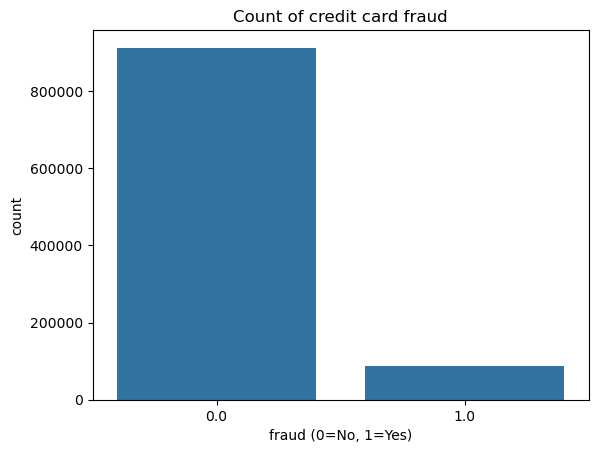

In [10]:
#Countplot visualization
sns.countplot(x='fraud',data=df)
plt.title('Count of credit card fraud')
plt.xlabel('fraud (0=No, 1=Yes)')
plt.ylabel('count')
plt.show()

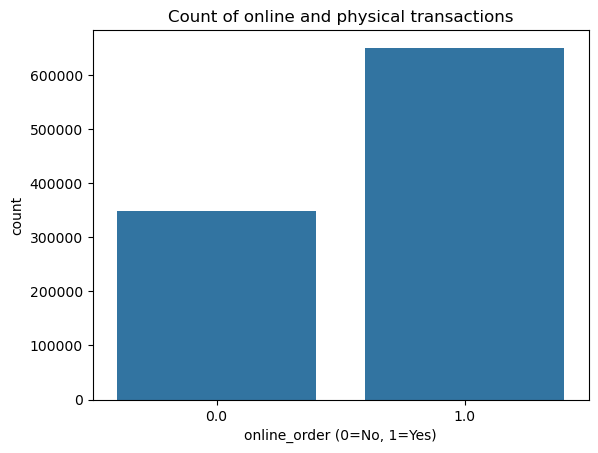

In [11]:
#Countplot visualization
sns.countplot(x='online_order',data=df)
plt.title('Count of online and physical transactions')
plt.xlabel('online_order (0=No, 1=Yes)')
plt.ylabel('count')
plt.show()

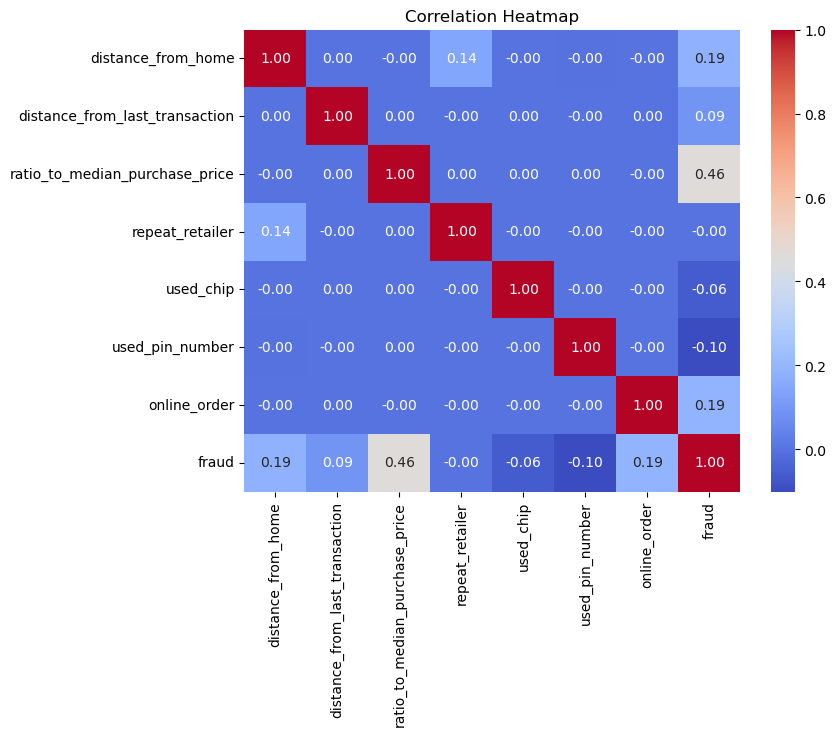

In [12]:
#Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
df.groupby('fraud')['ratio_to_median_purchase_price'].mean()

fraud
0.0    1.423642
1.0    6.006323
Name: ratio_to_median_purchase_price, dtype: float64

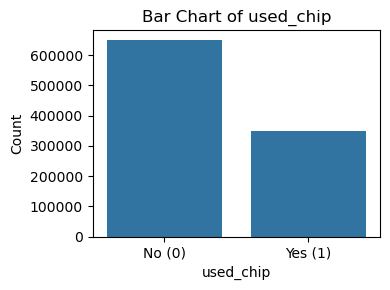

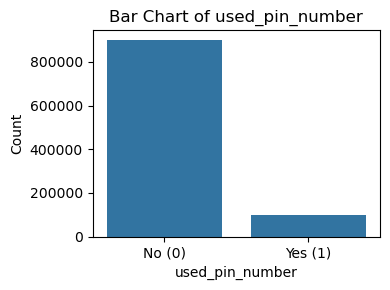

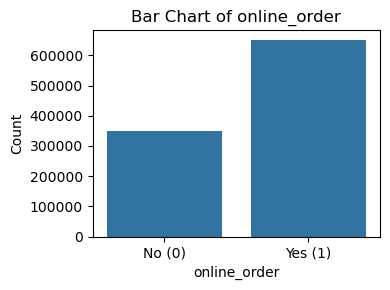

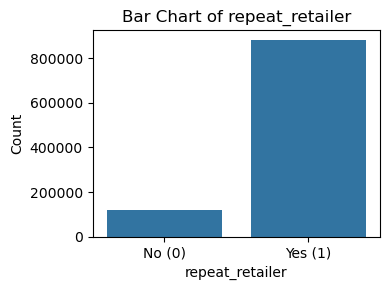

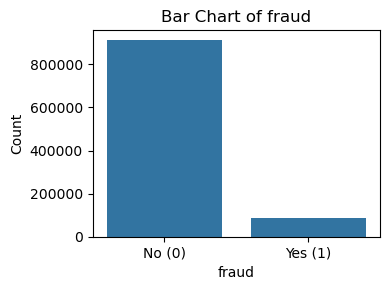

In [13]:
binary_features = ['used_chip', 'used_pin_number', 'online_order', 'repeat_retailer', 'fraud']

for feature in binary_features:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=feature, data=df)
    plt.title(f'Bar Chart of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
    plt.tight_layout()
    plt.show()

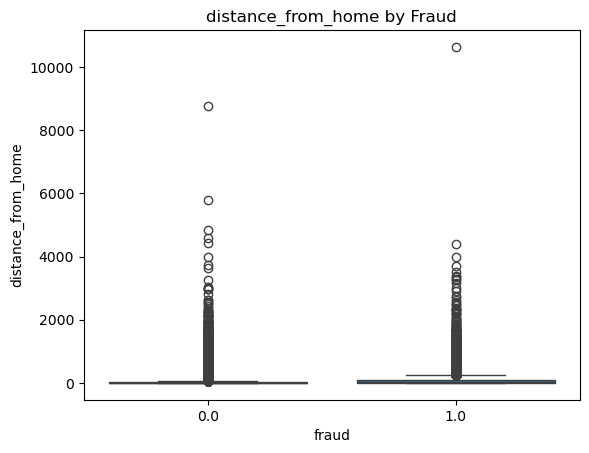

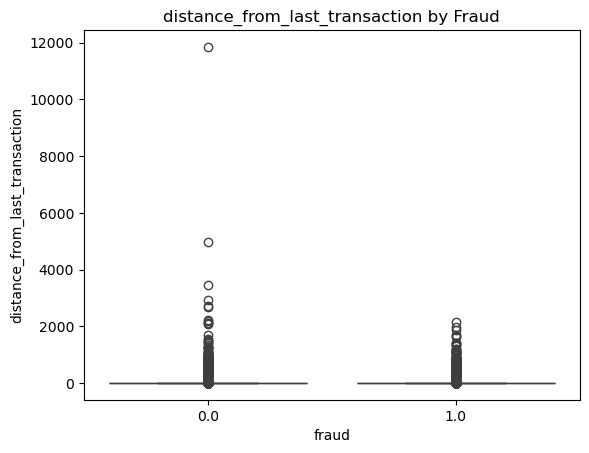

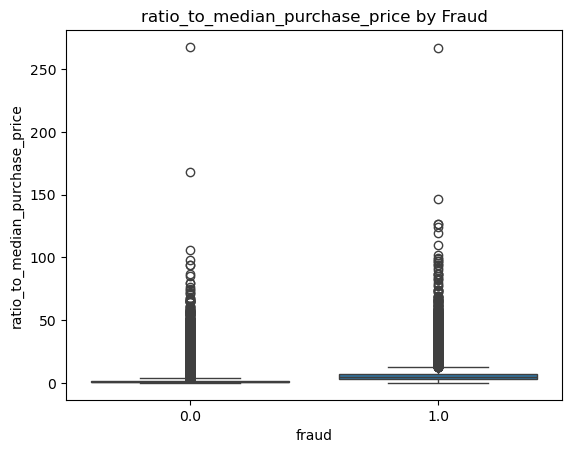

In [14]:
for col in ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']:
    sns.boxplot(x='fraud', y=col, data=df)
    plt.title(f'{col} by Fraud')
    plt.show()


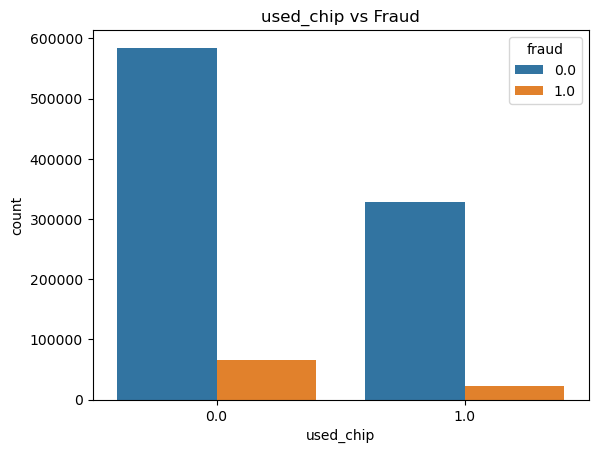

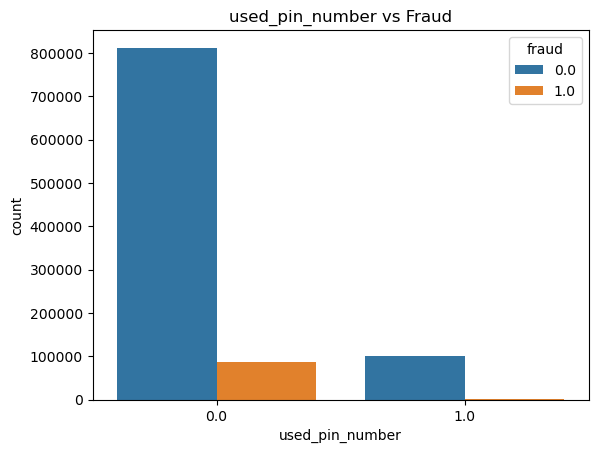

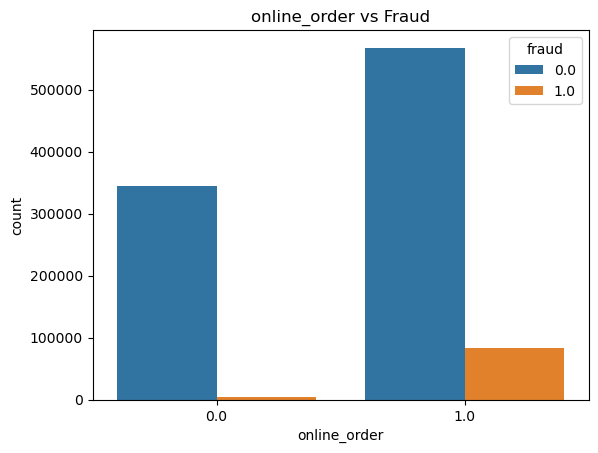

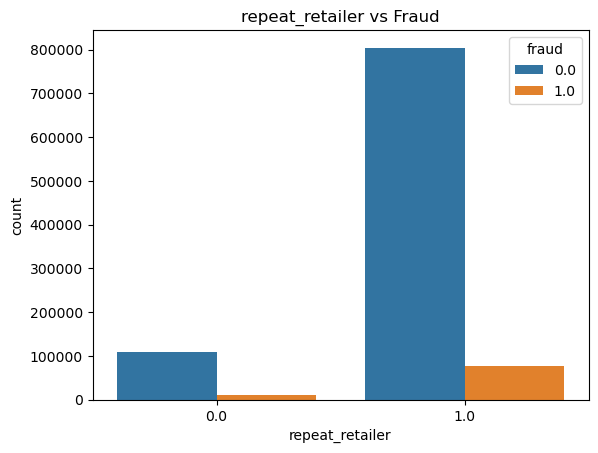

In [15]:
binary_cols = ['used_chip', 'used_pin_number', 'online_order', 'repeat_retailer']

for col in binary_cols:
    sns.countplot(x=col, hue='fraud', data=df)
    plt.title(f'{col} vs Fraud')
    plt.show()

In [30]:
#train-test split
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('fraud', axis=1)
y = df['fraud']

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression(class_weight='balanced', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[170381  12138]
 [   910  16571]]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [21]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X = df.drop('fraud', axis=1)
y = df['fraud']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Handle imbalance
scale = (y_train == 0).sum() / (y_train == 1).sum()

model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[182120    399]
 [    34  17447]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       0.98      1.00      0.99     17481

    accuracy                           1.00    200000
   macro avg       0.99      1.00      0.99    200000
weighted avg       1.00      1.00      1.00    200000



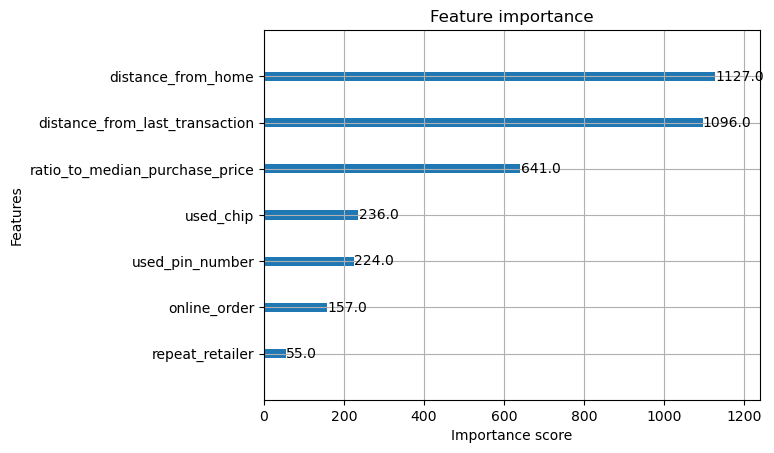

In [51]:
xgb.plot_importance(model, max_num_features=10)
plt.show()

In [52]:
import joblib
joblib.dump(model, 'xgboost_fraud_model.pkl')

['xgboost_fraud_model.pkl']